In [24]:
from fromscratchtoml.neural_network.models import Sequential
from fromscratchtoml.neural_network.optimizers import StochasticGradientDescent
from fromscratchtoml.neural_network.layers import Dense, Activation

import numpy as np
from sklearn.model_selection import train_test_split

from fromscratchtoml.toolbox.random import Distribution

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

# Neural Networks

## Fitting a XOR gate

In [3]:
model1 = Sequential()
model1.add(Dense(5, input_dim=2))
model1.add(Activation('sigmoid'))
model1.add(Dense(5))
model1.add(Activation('sigmoid'))
model1.add(Dense(5))
model1.add(Activation('sigmoid'))
model1.add(Dense(2))
model1.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.1)
model1.compile(optimizer=sgd, loss="mean_squared_error")

In [4]:
X = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
y = np.array([[1,0], [0,1], [0,1], [1,0]])
y

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [5]:
model1.fit(X, y, batch_size=4, epochs=1000)

[████████████████████████████████████████] 100%  epoch: 1000/1000 (4, 2) (4, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[1 0]
 [0 1]
 [0 1]
 [1 0]]
 acc: 50.00  loss: 0.500 


In [6]:
model1.predict(X)

array([0, 0, 1, 1])

## MNIST Digit Classification

In [7]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")
X = mnist.data/256.
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60000, random_state=42)
X_train.shape, y_train.shape

((10000, 784), (10000,))

In [8]:
a = []
for i in range(len(y_train)):
    x = np.zeros(10)
    x[int(y_train[i])] = 1.
    a.append(x)
    
y_train = np.array(a, dtype=np.float128)
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float128), (10000, 10))

In [9]:
a = []
for i in range(len(y_test)):
    x = np.zeros(10)
    x[int(y_test[i])] = 1.
    a.append(x)
    
y_test = np.array(a, dtype=np.float128)
y_test, y_test.shape

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float128), (60000, 10))

In [10]:
model2 = Sequential(verbose=True)
model2.add(Dense(30, input_dim=784))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=2)
model2.compile(optimizer=sgd, loss="mean_squared_error")

In [11]:
model2.fit(X_train, y_train, batch_size=10, epochs=10)

[████                                    ] 10%  epoch: 1/10 (10000, 10) (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
 acc: 83.53  loss: 0.033 
[████████                                ] 20%  epoch: 2/10 (10000, 10) (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
 acc: 81.76  loss: 0.036 
[████████████                            ] 30% 

KeyboardInterrupt: 

In [ ]:
model2.predict(X_test, one_hot=True)

In [ ]:
model2.predict(X_test)

In [ ]:
model2.accuracy(X_test, y_test)

## Training a single perceptron

In [12]:
model3 = Sequential()
model3.add(Dense(1, input_dim=1))
model3.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.1)
model3.compile(optimizer=sgd, loss="mean_squared_error")

In [13]:
X = np.array([1000])
y = np.array([0.2])

In [14]:
model3.fit(X, y, batch_size=1, epochs=2000)

[████████████████████████████████████████] 100%  epoch: 2000/2000 (1,) (1,)
[0]
[0.2]
 acc: 0.00  loss: 0.640 


In [17]:
model3.predict(X)

array([0])

In [16]:
X[0].shape

()

## Iris Dataset

In [56]:
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target[:]
X, Y = shuffle(X, Y, random_state=10)

Xtrain = X[:120]
Ytrain = Y[:120]
Xtest = X[120:]
Ytest = Y[120:]

In [57]:
Xtrain, X_test, Ytrain, y_test = train_test_split(Xtrain, Ytrain, test_size=0, random_state=42)

In [58]:
Xtrain[0].shape, Ytrain

((2,), array([1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0,
        1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1,
        2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0,
        0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2,
        2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0,
        1, 0, 2, 0, 2, 0, 0, 0, 2, 1]))

In [59]:
model4 = Sequential()
model4.add(Dense(10, input_dim=2))
model4.add(Activation('sigmoid'))
model4.add(Dense(10))
model4.add(Activation('sigmoid'))
model4.add(Dense(10))
model4.add(Activation('sigmoid'))
model4.add(Dense(3))
model4.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.1)
model4.compile(optimizer=sgd, loss="mean_squared_error")

In [60]:
len(Ytrain[0].shape)

0

In [61]:
model4.fit(Xtrain, Ytrain, batch_size=1200, epochs=20)

[████████████████████████████████████████] 100%  epoch: 20/20 (120,) (120,)
[1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 0 2 1 2 1 1 1 0 2 1 1 1 1 1 2 2 1
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 0 1 1 2 0 2 1 2 1 1 1 1
 2 1 1 1 0 1 1 2 0 1 2 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1
 0 1 2 1 0 2 2 1 1]
[1 1 0 0 1 2 2 1 0 0 0 2 2 2 2 0 1 1 2 0 0 0 1 0 1 1 2 0 0 1 1 2 2 1 0 0 1
 1 2 1 2 0 1 1 2 0 1 1 1 2 2 0 1 2 2 1 1 0 2 0 1 1 0 2 2 0 0 0 1 0 2 1 1 1
 0 2 1 1 0 1 2 0 0 1 0 0 0 2 2 1 2 2 0 2 1 1 2 2 1 2 1 2 0 0 0 2 1 2 2 0 1
 0 2 0 2 0 0 0 2 1]
 acc: 99.17  loss: 1.292 


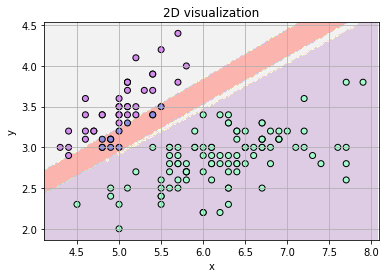

In [62]:
binary_visualize(X, clf=model4, draw_contour=True, coarse=50, color_seed=1980)

## Radial

In [78]:
X1 = Distribution.radial_binary(pts=30,
               mean=[0, 0],
               st=1,
               ed=2, seed=20)
X2 = Distribution.radial_binary(pts=30,
               mean=[0, 0],
               st=4,
               ed=5, seed=20)

Y1 = np.zeros(X1.shape[0])
Y2 = np.ones(X1.shape[0])

X = np.vstack((X1, X2))
y = np.hstack((Y1, Y2))

In [79]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0, random_state=42)

In [80]:
model5 = Sequential()
model5.add(Dense(10, input_dim=2))
model5.add(Activation('sigmoid'))
model5.add(Dense(10))
model5.add(Activation('sigmoid'))
model5.add(Dense(10))
model5.add(Activation('sigmoid'))
model5.add(Dense(10))
model5.add(Activation('sigmoid'))
model5.add(Dense(2))
# model5.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.1)
model5.compile(optimizer=sgd, loss="mean_squared_error")

In [81]:
model5.fit(X, y, batch_size=1200, epochs=200)

[████████████████████████████████████████] 100%  epoch: 200/200 (60,) (60,)
[0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1]
[0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
 acc: 98.33  loss: 0.500 


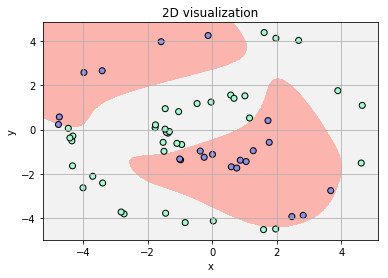

In [82]:
binary_visualize(X, clf=model5, draw_contour=True, coarse=50, color_seed=1980)